In [18]:
import main
from hatespeech import HateSpeechClassifier
import pandas as pd
import numpy as np

%matplotlib inline

In [32]:
csf = HateSpeechClassifier()
X, y = csf.build()
tweets = csf.df.tweet
feats_names = csf.feature_names

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe75fbea90>]],
      dtype=object)

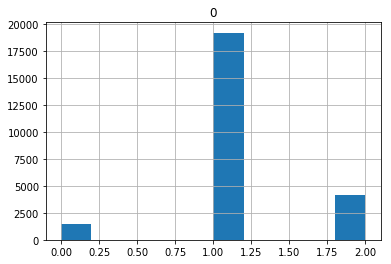

In [33]:
pd.DataFrame(y).hist()

In [38]:
X.shape, len(feats_names)

((24783, 11145), 11145)

In [39]:
new_data = pd.DataFrame(X, columns=feats_names)
new_data['class'] = y
new_data.describe()

ab          abil           abl           abo         abort  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.002918      0.002258      0.003240      0.007125      0.002961   
std        0.162368      0.145097      0.169970      0.239054      0.184221   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        9.038472      9.326154      8.920689      8.026871     18.344006   

               abov       absolut           abt           abu          abus  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.004180      0.008522      0.003600      0.002302      0.003870   
std        0.189924      0.258047      0.196267      0.170824      0.183675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.633007      7.822076     17.841377     19.016951      8.720018   

           ...          num_words  num_unique_words     vader neg  \
count      ...       24783.000000      24783.000000  24783.000000   
mean       ...          13.592947         12.913933      0.228975   
std        ...           6.885442          6.281764      0.205714   
min        ...           1.000000          1.000000      0.000000   
25%        ...           8.000000          8.000000      0.000000   
50%        ...          13.000000         12.000000      0.219000   
75%        ...          19.000000         18.000000      0.368000   
max        ...          36.000000         33.000000      1.000000   

          vader pos     vader neu  vader compound  num_hashtags  num_mentions  \
count  24783.000000  24783.000000    24783.000000  24783.000000  24783.000000   
mean       0.094317      0.676709       -0.259380      0.778961      0.778195   
std        0.129019      0.214635        0.480408      2.006578      0.875600   
min        0.000000      0.000000       -0.992400      0.000000      0.000000   
25%        0.000000      0.526000       -0.659700      0.000000      0.000000   
50%        0.000000      0.674000       -0.340000      0.000000      1.000000   
75%        0.171000      0.828000        0.000000      1.000000      1.000000   
max        0.859000      1.000000        0.983400     77.000000     10.000000   

           num_urls    is_retweet  
count  24783.000000  24783.000000  
mean       0.124117      0.064924  
std        0.341150      0.246396  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 11145 columns]

In [40]:
new_data.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
0  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
1  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
2  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
3  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
4  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

   num_words  num_unique_words  vader neg  vader pos  vader neu  \
0       25.0              23.0      0.000      0.120      0.880   
1       16.0              16.0      0.237      0.000      0.763   
2       20.0              18.0      0.538      0.000      0.462   
3        8.0               8.0      0.000      0.344      0.656   
4       26.0              23.0      0.109      0.229      0.662   

   vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
0          0.4563           0.0           1.0       0.0         0.0  
1         -0.6876           0.0           1.0       0.0         0.0  
2         -0.9550           0.0           2.0       0.0         1.0  
3          0.5673           0.0           2.0       0.0         0.0  
4          0.6331           1.0           1.0       0.0         0.0  

[5 rows x 11145 columns]

In [47]:
from sklearn.utils import shuffle
data = shuffle(new_data)
data.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
15274  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
4485   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
3588   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
5700   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
22388  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

       num_words  num_unique_words  vader neg  vader pos  vader neu  \
15274       20.0              19.0      0.141      0.000      0.859   
4485         3.0               3.0      0.418      0.378      0.204   
3588        26.0              25.0      0.293      0.255      0.452   
5700        10.0              10.0      0.384      0.195      0.421   
22388       15.0              12.0      0.703      0.000      0.297   

       vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
15274         -0.3875           0.0           1.0       0.0         1.0  
4485          -0.1007           0.0           1.0       0.0         1.0  
3588          -0.1531           0.0           1.0       0.0         0.0  
5700          -0.5574           0.0           1.0       0.0         0.0  
22388         -0.9481           1.0           0.0       0.0         0.0  

[5 rows x 11145 columns]

In [64]:
# une os datasets com o mesmo numero de exemplos
num_samples = 600

data_class0 = data[data['class']==0].sample(n=num_samples)
data_class1 = data[data['class']==1].sample(n=num_samples)
data_class2 = data[data['class']==2].sample(n=num_samples)

data_equal = pd.concat([data_class0, data_class1, data_class2])

## Teste com modelos

In [86]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
# from sklearn.feature_selection import SelectFromModel

def conf_matrix(matrix):
    matrix_proportions = np.zeros((3, 3))
    for i in range(0, 3):
        matrix_proportions[i, :] = matrix[i, :] / float(matrix[i, :].sum())
            
    return matrix_proportions



X = data_equal.drop(['class'], axis=1)
y = data_equal['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1
)


### LogisticRegression

In [90]:
lr_clf = LogisticRegression(penalty='l2', C=0.01, class_weight='balanced')

lr_clf.fit(X_train, y_train)
y_preds = lr_clf.predict(X_test)

cm = confusion_matrix(y_test, y_preds)
r = conf_matrix(cm)
print(r)

[[0.73134328 0.17910448 0.08955224]
 [0.20408163 0.75510204 0.04081633]
 [0.046875   0.03125    0.921875  ]]


In [96]:
LR = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 0.1, 0.01],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(
    estimator=LR,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=10, random_state=42).split(X_train, y_train),
    verbose=1,
    n_jobs=5
)

In [97]:
model = grid_search.fit(X_train, y_train)
y_preds = model.predict(X_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.0s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:   54.5s finished


In [98]:
dir(grid_search)
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [100]:
cm = confusion_matrix(y_test, y_preds)
r = conf_matrix(cm)
print(r)

[[0.68656716 0.19402985 0.11940299]
 [0.18367347 0.7755102  0.04081633]
 [0.03125    0.015625   0.953125  ]]


### With KNeighborsClassifier

In [101]:
neigh = KNeighborsClassifier(n_neighbors=30, n_jobs=5)
neigh.fit(X, y)

neighbors_ind = neigh.kneighbors(return_distance=False)


In [117]:
data_meta = X.copy()

In [118]:
data_meta.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
5913   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
2976   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
5335   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
13313  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
9057   0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

       num_words  num_unique_words  vader neg  vader pos  vader neu  \
5913        17.0              16.0      0.110      0.000      0.890   
2976        13.0              11.0      0.294      0.248      0.459   
5335         1.0               1.0      0.000      0.000      1.000   
13313       24.0              24.0      0.334      0.075      0.590   
9057         7.0               7.0      0.368      0.000      0.632   

       vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
5913          -0.2462           0.0           2.0       0.0         0.0  
2976          -0.2500           0.0           1.0       0.0         1.0  
5335           0.0000           0.0           1.0       0.0         0.0  
13313         -0.7845           0.0           0.0       0.0         0.0  
9057          -0.5423           0.0           0.0       0.0         0.0  

[5 rows x 11144 columns]

In [133]:
# cria features de count_label

data_meta['count_neighbors_0'] = np.apply_along_axis(
    lambda array: np.size(y.iloc[array][y.iloc[array]==0]), 1, neighbors_ind
)
data_meta['count_neighbors_1'] = np.apply_along_axis(
    lambda array: np.size(y.iloc[array][y.iloc[array]==1]), 1, neighbors_ind
)
data_meta['count_neighbors_2'] = np.apply_along_axis(
    lambda array: np.size(y.iloc[array][y.iloc[array]==2]), 1, neighbors_ind
)

In [134]:
data_meta[['count_neighbors_0', 'count_neighbors_1', 'count_neighbors_2']].head()

count_neighbors_0  count_neighbors_1  count_neighbors_2
5913                   7                  7                 16
2976                  14                  9                  7
5335                  13                 10                  7
13313                 11                  5                 14
9057                   9                 13                  8

In [137]:
# cria features de count_label/max_count_label
def count_max(array, label):
    neighbors_labels = y.iloc[array]
    counts = [np.size(neighbors_labels[neighbors_labels == x]) for x in (0, 1, 2)]
    big = np.max(counts)
    return np.size(neighbors_labels[neighbors_labels==label]) / big

data_meta['count_max_neighbors_0'] = np.apply_along_axis(count_max, 1, neighbors_ind, 0)
data_meta['count_max_neighbors_1'] = np.apply_along_axis(count_max, 1, neighbors_ind, 1)
data_meta['count_max_neighbors_2'] = np.apply_along_axis(count_max, 1, neighbors_ind, 2)

In [139]:
data_meta[['count_max_neighbors_0', 'count_max_neighbors_1', 'count_max_neighbors_2']].head()

count_max_neighbors_0  count_max_neighbors_1  count_max_neighbors_2
5913                0.437500               0.437500               1.000000
2976                1.000000               0.642857               0.500000
5335                1.000000               0.769231               0.538462
13313               0.785714               0.357143               1.000000
9057                0.692308               1.000000               0.615385

In [185]:
# cria features de distancia
from nltk.cluster import cosine_distance

"""
for indexes, label in get_labels_and_indices(y, ind):
    if not indexes:
        continue

    min_dist = indexes[0]
    max_dist = indexes[-1]
    mean_dist = indexes[round(len(indexes) / 2)]
    qinf_dist = indexes[:splitter][-1] if len(indexes) > splitter else indexes[0]
    qsup_dist = indexes[splitter:][0] if len(indexes) > splitter else indexes[0]

    mid = X[min_dist]
    mad = X[max_dist]
    med = X[mean_dist]
    qinf = X[qinf_dist]
    qsup = X[qsup_dist]

    col = label * 5

    m[i][col] = cosine_distance(xi, mid)
    m[i][col+1] = cosine_distance(xi, mad)
    m[i][col+2] = cosine_distance(xi, med)
    m[i][col+3] = cosine_distance(xi, qinf)
    m[i][col+4] = cosine_distance(xi, qsup)
"""

def resolve_min_dist(array, label):
    neighbors_labels = y.iloc[neighbors[i]]
    neighbors_labels = neighbors_labels[neighbors_labels==label]
    
    if np.any(neighbors_labels):
        return cosine_distance(row, neighbors_labels[0])
    
for idx, indexes in enumerate(neighbors_ind):
    
    

data_meta['min_dist_0'] = np.apply_along_axis(resolve_min_dist, 1, neighbors_ind, 0)
    
    


IndexError: ('index 5913 is out of bounds for axis 0 with size 1800', 'occurred at index 5913')

In [184]:
data_meta[['min_dist_0']]

min_dist_0
5913         5913
2976         2976
5335         5335
13313       13313
9057         9057
20973       20973
16323       16323
663           663
9670         9670
20269       20269
6816         6816
1853         1853
12587       12587
2585         2585
8249         8249
4959         4959
6443         6443
23226       23226
2819         2819
21118       21118
19709       19709
20325       20325
6602         6602
4730         4730
7492         7492
3912         3912
9044         9044
22170       22170
22802       22802
23316       23316
...           ...
6665         6665
2719         2719
712           712
8919         8919
17739       17739
24205       24205
19382       19382
22896       22896
17085       17085
22623       22623
8704         8704
13882       13882
10010       10010
3090         3090
1972         1972
16762       16762
20073       20073
24156       24156
16698       16698
22208       22208
14462       14462
3965         3965
6350         6350
22875       22875
8434         8434
7839         7839
7977         7977
4215         4215
23722       23722
19780       19780

[1800 rows x 1 columns]

#### rodando modelo novamente....

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    data_meta, y, test_size=0.1
)

In [169]:
LR = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 0.1, 0.01],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(
    estimator=LR,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=10, random_state=42).split(X_train, y_train),
    verbose=1,
    n_jobs=5
)

model = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.8s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:   58.0s finished


In [170]:
y_preds = model.predict(X_test)

cm = confusion_matrix(y_test, y_preds)
r = conf_matrix(cm)
print(r)

[[0.67924528 0.20754717 0.11320755]
 [0.05797101 0.85507246 0.08695652]
 [0.         0.03448276 0.96551724]]


In [167]:
quantile_list = [0, .25, .5, .75, 1.]
pd.DataFrame([2313, 21, 232,111]).quantile(quantile_list)

0
0.00    21.00
0.25    88.50
0.50   171.50
0.75   752.25
1.00  2313.00